In [176]:
import igraph as ig
from math import factorial, pi, sin, cos, exp, comb
import random
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib import pylab

from utils import linearize_graph, catalan_number

In [462]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
          'axes.labelsize': 'x-large',
          'axes.titlesize': 'xx-large',
          'xtick.labelsize': 'large',
          'ytick.labelsize': 'medium',
          'axes.grid': False}
pylab.rcParams.update(params)

In [463]:
n = 1000
sample_size = 10000

#### probability of random node being on component of size s

In [464]:
def p_tilde_s(s, c):
    return s**(s-1)*c**(s-1)*exp(-s*c)/factorial(s)

def p_tilde_s_simulation(n, c, sample_size):
    sizes = Counter()
    for i in range(sample_size):
        g = ig.Graph.Erdos_Renyi(n, c / n)
        node = random.randint(0, g.vcount() - 1)
        components = g.components()
        component_size = components.sizes()[components.membership[node]]
        sizes[component_size] += 1
    return sizes.keys(), [sizes[s] / sample_size for s in sizes.keys()]

Text(0.5, 0.98, '$\\tilde{p}\\left(s\\right)=s^{s-1}c^{s-1}e^{-cs}/s!$')

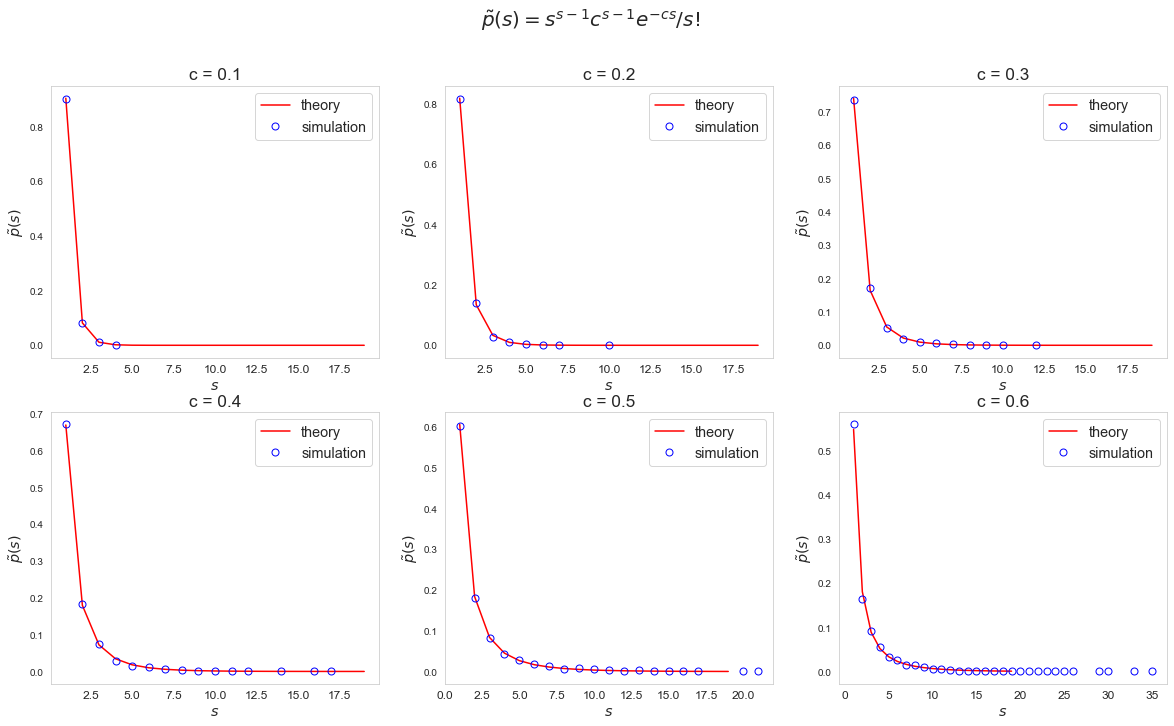

In [471]:
fig, axes = plt.subplots(2, 3, figsize=(20, 11))
for c, ax in zip([0.1,0.2,0.3,0.4,0.5,0.6], axes.ravel()):
    x_sim, y_sim = p_tilde_s_simulation(1000, c, 3000)
    x_theory = range(1, 20)
    y_theory = [p_tilde_s(s, c) for s in x_theory]

    ax.plot(x_theory, y_theory, **theory_params)
    ax.plot(x_sim, y_sim, **simulation_params)
    ax.set_xlabel('$s$')
    ax.set_ylabel(r'$\tilde{p}(s)$')
    ax.set_title('c = {}'.format(c))
   # ax.set_ylim(0, 1)
    ax.legend()
plt.suptitle(r'$\tilde{p}\left(s\right)=s^{s-1}c^{s-1}e^{-cs}/s!$', fontsize=20)

### probability that a random walk is on a chain of length s

In [99]:
def p_hat_s(s, c):
    max_sum_index = 30
    if s == 1:
        return p_tilde_s(1, c)
    return 2/s*p_tilde_s(s, c)+sum([1/(i)*p_tilde_s(i, c) for i in range(s+1, max_sum_index)])

def p_hat_s_simulation(n, c, sample_size):
    sizes = Counter()
    for i in range(sample_size):
        g = linearize_graph(ig.Graph.Erdos_Renyi(n, c / n))
        node = random.randint(0, g.vcount() - 1)
        components = g.components()
        component = components[components.membership[node]]
        chains = [node-component[0]+1, component[-1]-node+1]
        if chains[0] == 1:
            chain = chains[1]
        elif chains[1] == 1:
            chain = chains[0]
        else:
            chain = random.choice(chains)
        sizes[chain] += 1
    return sizes.keys(), [sizes[s] / sample_size for s in sizes.keys()]

Text(0.5, 0.98, '$\\hat{p}\\left(s\\right)=\\frac{2}{s}+\\sum_{s^{\\prime}=s+1}^{\\infty}\\frac{1}{s^{\\prime}}\\tilde{p}\\left(s^{\\prime}\\right)$')

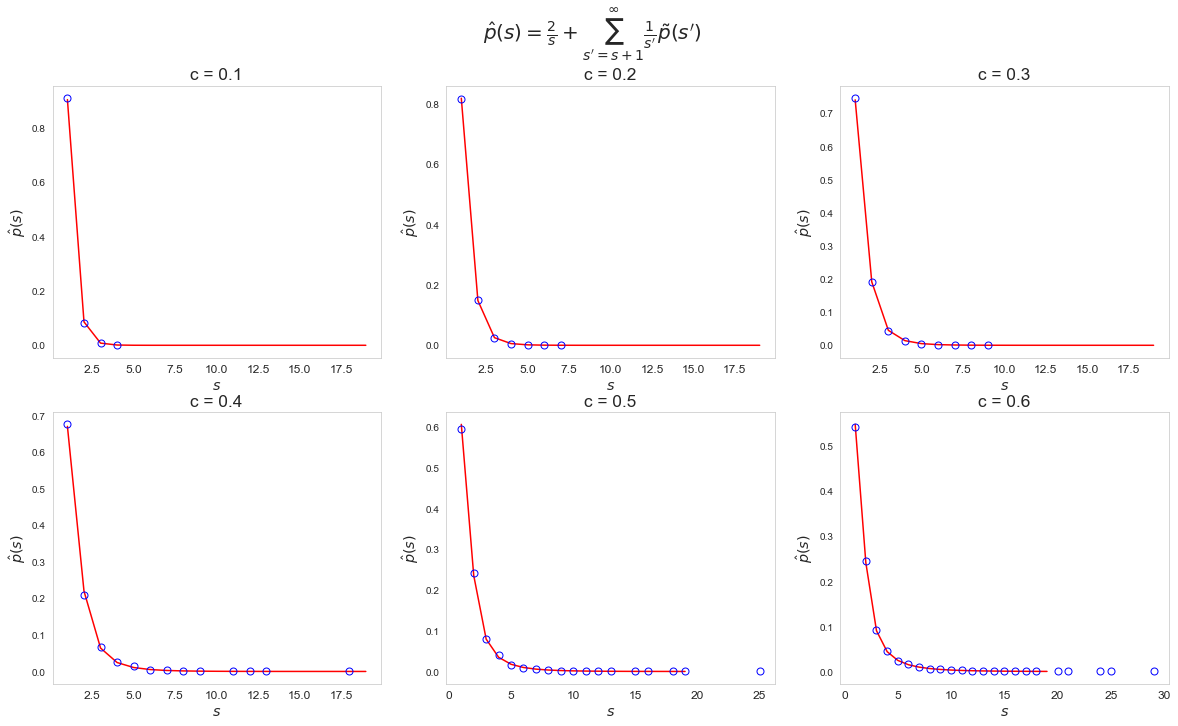

In [472]:
fig, axes = plt.subplots(2, 3, figsize=(20, 11))
for c, ax in zip([0.1,0.2,0.3,0.4,0.5,0.6], axes.ravel()):
    x_sim, y_sim = p_hat_s_simulation(1000, c, 3000)
    x_theory = range(1, 20)
    y_theory = [p_hat_s(s, c) for s in x_theory]

    ax.plot(x_theory, y_theory, **theory_params)
    ax.plot(x_sim, y_sim, **simulation_params)
    ax.set_xlabel('$s$')
    ax.set_ylabel('$\hat{p}(s)$')
    ax.set_title('c = {}'.format(c))
plt.suptitle(r'$\hat{p}\left(s\right)=\frac{2}{s}+\sum_{s^{\prime}=s+1}^{\infty}\frac{1}{s^{\prime}}\tilde{p}\left(s^{\prime}\right)$', fontsize=20)

### number of dyck paths of bounded height

In [585]:
def dyck_Snk(n, k):
    return round(2**(2*n+1)/(k+2)*sum([(sin(pi*i/(k+2)))**2*(cos(pi*i/(k+2)))**(2*n) for i in range(1,(k+1)+1)]))

def fnkab(n, k, a, b):
    return round(2**(n+1)/(k+1)*sum([sin(pi*i*a/(k+1))*sin(pi*i*b/(k+1))*(cos(pi*i/(k+1)))**n for i in range(1,k+1)]))

def dyck_Tnk(n, k):
    return dyck_Snk(n, k) - dyck_Snk(n, k-1)


def F(n, k, b):
    t = 2*n
    result = 0
    for j in range(1, k+1):
        result += sin(j*pi/(k + 1)) * sin(b*j*pi/(k + 1)) * (2*cos(j*pi/(k+ 1)))**t
    return round(2/(k + 1) * result)

def FF(n, k):
    return sum([F(n, k, b) for b in range(1, k+1)])


# def dyck_Snk_counter(n, k):
#     if k == 0:
#         return 0
#     paths = [0]
#     for i in range(2*n):
#         new_paths = []
#         for path in paths:
#             if path == 0:
#                 new_paths.append(path+1)
#             else:
#                 new_paths.append(path-1)
#                 if path < k:
#                     new_paths.append(path+1)
#         paths = new_paths
#     return paths.count(0)
#
# def dyck_Tnk_counter(n, k):
#     return dyck_Snk_counter(n, k) - dyck_Snk_counter(n, k-1)

from texttable import Texttable
n = 10
t = Texttable()
t.add_rows([['n', 'k', 'dyck_Snk', 'f']] + [[i, j, dyck_Snk(i, j-1), F(i,j,1)] for i in range(1,n+1) for j in range(1,i+1)])
print(t.draw())

+----+----+----------+-------+
| n  | k  | dyck_Snk |   f   |
+====+====+==========+=======+
| 1  | 1  | 0        | 0     |
+----+----+----------+-------+
| 2  | 1  | 0        | 0     |
+----+----+----------+-------+
| 2  | 2  | 1        | 1     |
+----+----+----------+-------+
| 3  | 1  | 0        | 0     |
+----+----+----------+-------+
| 3  | 2  | 1        | 1     |
+----+----+----------+-------+
| 3  | 3  | 4        | 4     |
+----+----+----------+-------+
| 4  | 1  | 0        | 0     |
+----+----+----------+-------+
| 4  | 2  | 1        | 1     |
+----+----+----------+-------+
| 4  | 3  | 8        | 8     |
+----+----+----------+-------+
| 4  | 4  | 13       | 13    |
+----+----+----------+-------+
| 5  | 1  | 0        | 0     |
+----+----+----------+-------+
| 5  | 2  | 1        | 1     |
+----+----+----------+-------+
| 5  | 3  | 16       | 16    |
+----+----+----------+-------+
| 5  | 4  | 34       | 34    |
+----+----+----------+-------+
| 5  | 5  | 41       | 41    |
+----+--

### the probability of a walk on chain of length s returning in 2k steps

In [592]:
from math import comb
def chos(t, s):
    tt = t-2
    n = 2*s-4
    g = int((tt+n)/2)
    return n/g*comb(tt, g)

def p_t_given_s(t, s):
    if t % 2 == 1:
        return 0
    # return dyck_Snk(round(t/2)-1, s-2)/(2**(t-1))#+FF(t/2, s)
    # if s == 2:
    #     return t==2
    # if s == 3:
    #     return (1/2)**(t/2)
    # if s == 4:
    #     return 1/9*(2**(1-t)*3**(t/2)+3*(t==2))
    # # if s == 5:
    # #     return 1/25*((5/2)**(t/2)*3**(1-t/2)+10*(t==2))
    # return dyck_Snk(round(t/2)-1, s-3)*(1/2)**(t-1)+dyck_Tnk(round(t/2)-1, s-2)*(1/2)**(t-2)
    # return dyck_Snk(round(t/2)-1, s-2)*(1/2)**(t-1)
    # return 0*dyck_Snk(round(t/2)-1, 2*s-4)*(1/2)**(t-1)+chos(t,s)*(1/2)**(t-1)
    return (fnkab(t-2, 2*s-3, 1, 1)+fnkab(t-2, 2*s-3, 1, 2*s-3))*(1/2)**(t-1)


def fnkab(n, k, a, b):
    return round(2**(n+1)/(k+1)*sum([sin(pi*i*a/(k+1))*sin(pi*i*b/(k+1))*(cos(pi*i/(k+1)))**n for i in range(1,k+1)]))

In [594]:
t=10
s=4
print(fnkab(6,3,1,1))
# print(dyck_Snk(round(t/2)-1, s-2))
# print(FF(t/2, s))

4


In [ ]:

s = 5
for s in [4,5,6,7,8,9,10]:
    g = ig.Graph()
    g.add_vertices(s)
    for i in range(s-1):
        g.add_edge(i, i+1)
    ig.plot(g, vertex_label=range(s))
    from markov import get_probabilities
    max_step = 100
    x = range(2,max_step,2)
    y_markov = get_probabilities(g, 0, max_step)[::2]
    y_linear = [p_t_given_s(t, s) for t in x]
    plt.plot(x, y_linear, **theory_params)
    plt.plot(x, y_markov, **simulation_params)
    plt.title(f'$p(t=2n|s={s})$')
    plt.xlabel('$t$')
    plt.ylabel('$p$')
    plt.legend()
    plt.show()

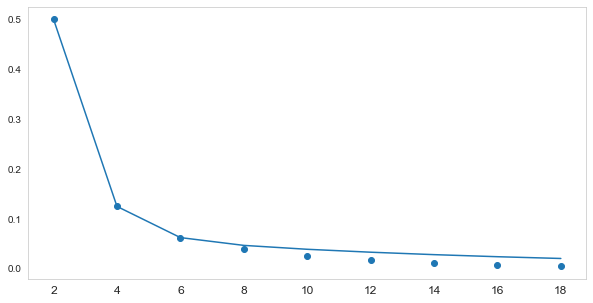

### the probability of a walk to return after t steps

In [284]:
def p_t(t, c):
    if t % 2 == 1:
        return 0
    return sum([p_t_given_s(t, s)*p_hat_s(s, c) for s in range(2, 100)])

In [215]:
c = 0.3
p_t(2, c)/(1-exp(-c))

0.4999999906600795

In [490]:
import pandas as pd
import numpy as np
df = pd.concat([pd.read_hdf(f'./data/walks_0-4_s200000.h5', 'table'),pd.read_hdf(f'./data/walks_0-1_s200000.h5', 'table')])
df['c'] = df['c'].round(3)
df_linearized = pd.read_hdf('./data/walks_linearized_0-1_s200000.h5', 'table')
df_linearized['c'] = df_linearized['c'].round(3)
def simulation_data(df, c, max_length_to_return, filter_retroceding=True, return_odd=False):
    filtered_df = df[(df['c'] == c)]
    if filter_retroceding:
        filtered_df = filtered_df[filtered_df['is_retroceding']]
    size = filtered_df.shape[0]
    filtered_df = filtered_df[filtered_df['walk_length'] < max_length_to_return]
    filtered_df = filtered_df.groupby('walk_length').count().reset_index()
    filtered_df['p'] = filtered_df['c'] / size
    if not return_odd:
        filtered_df = filtered_df[filtered_df['walk_length'] % 2 == 0]
    return filtered_df['walk_length'], filtered_df['p']

In [ ]:
simulation_params_linearized = {
    'color':'blue', 'marker':'x', 'markersize':10, 'linestyle':'none', 'markerfacecolor':'none',
    'label': 'simulation (linearized)'
}
simulation_params = {
    'color':'blue', 'marker':'o', 'markersize':7, 'linestyle':'none', 'markerfacecolor':'none',
    'label': 'simulation'
}

theory_params = {
    'color':'red',
    'label': 'theory'
}


for c in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4]:

    plt.figure(figsize=(10, 12))
    plt.subplot(211)

    x_theory = range(2,20,2)
    y_theory = [p_t(s, c)/(1-exp(-c)) for s in x_theory]
    plt.plot(x_theory, y_theory, **theory_params)
    x, y = simulation_data(df, c, max_length_to_return=20, filter_retroceding=True)
    plt.plot(x, y, **simulation_params)

    x_linearized, y_linearized = simulation_data(df_linearized, c, max_length_to_return=20, filter_retroceding=True)
    plt.plot(x_linearized, y_linearized, **simulation_params_linearized)



    # Set plot labels and title
    plt.xlabel('$t$')
    plt.ylabel('$P(T_{FR} = t|retro)$')
    plt.ylim(0,1)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.title(f'$c = {c}$')

    inset = plt.gca().inset_axes([0.45, 0.45, 0.545, 0.54])
    inset.plot(x_theory, y_theory, **theory_params)
    inset.plot(x, y, **simulation_params)
    inset.plot(x_linearized, y_linearized, **simulation_params_linearized)

    inset.set_xlim(9, 19)
    inset.set_ylim(0, 0.05)
    plt.legend()

    plt.subplot(212)
    plt.plot(x_theory, y_theory, **theory_params)
    plt.plot(x, y, **simulation_params)
    plt.plot(x_linearized, y_linearized, **simulation_params_linearized)


    plt.xlabel('$t$')
    # plt.ylabel('$\log(P(T_{FR} = t))$')
    plt.yscale('log')
    plt.ylim(0, 1.1)
    plt.title('log scale')

    plt.tight_layout()
    plt.show()

In [196]:
y_theory

[5.756758496514637e+30,
 1.6845307272261043e+29,
 4.4649670210040327e+27,
 1.0834743020893736e+26,
 2.477780596731586e+24,
 5.444819491828832e+22,
 1.163426262893234e+21,
 2.4352903374819504e+19,
 5.017934741419521e+17]

[2, 1]
46
2
[45, 46]


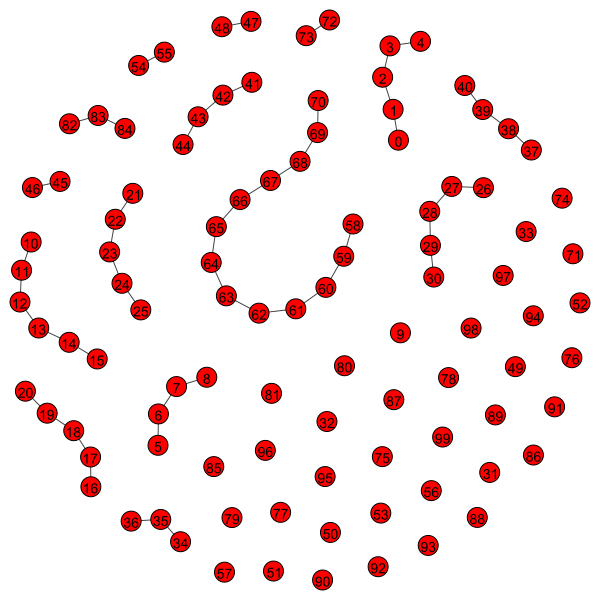

In [98]:
g = linearize_graph(ig.Graph.Erdos_Renyi(100, 1 / 100))
node = random.randint(0, g.vcount() - 1)
components = g.components()
component_size = components.sizes()[components.membership[node]]
component = components[components.membership[node]]
print([node-component[0]+1, component[-1]-node+1])
print(node)
print(component_size)
print(components[components.membership[node]])
ig.plot(g, vertex_label=range(n))


In [522]:
def random_1d_walk(max_time):
  h = 1
  t = 1
  position = 1
  while (position != 0) and (t < max_time):
    step = random.choice([-1,1])
    position += step
    t += 1
    h = max(position, h)
  return {'t': t, 'h': h}

samples = 10000000
max_time = 100000 # stop the walk after this amount of steps
walks = pd.DataFrame([random_1d_walk(max_time) for _ in range(samples)])

In [527]:
walks.to_csv('./data/1d_walks.csv.zip', compression='zip')

In [607]:
def bounded_random_1d_walk(length, start, end):
  t = 0
  position = start
  max_height = position

  while True:
    if position == 1:
      step = 1
    elif position == length:
      step = -1
    else:
      step = random.choice([-1,1])

    position += step
    t += 1
    max_height = max(position, max_height)

    if position == end:
      break

  return {'t': t, 'h': length} #, 'start': start, 'end': end, 'max_height': max_height}

In [608]:
samples_factor = 10000
walks_first_return = pd.DataFrame([bounded_random_1d_walk(l, 1, 1) for l in range(3,11) for _ in range(samples_factor*l*l)])
walks_first_return.to_csv('./data/1d_bounded_walks_first_return.csv.zip', compression='zip')

In [609]:
walks_first_passage = pd.DataFrame([bounded_random_1d_walk(l, 1, l) for l in range(3,11) for _ in range(samples_factor*l*l)])
walks_first_passage.to_csv('./data/1d_bounded_walks_first_passage_to_end.csv.zip', compression='zip')

In [610]:
walks_first_passage = pd.DataFrame([bounded_random_1d_walk(l, 2, l) for l in range(3,11) for _ in range(samples_factor*l*l)])
walks_first_passage.to_csv('./data/1d_bounded_walks_first_passage_2_to_end.csv.zip', compression='zip')